# Hierarchical Clustering
- The goal is to make clusters from the data to segment similar customers together.

## Dependency

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

## Parameter

In [2]:
CSV_01 = '../data/Wholesale customers data.csv'

## Load data
- The values represent the number of units purchased by each client for each product.

In [3]:
df = pd.read_csv(CSV_01)

In [4]:
print(df.shape)
print(df.dtypes)

(440, 8)
Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


In [5]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
df.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


## Preprocess data

In [8]:
data_scaled = normalize(df)
df_scaled = pd.DataFrame(data_scaled, columns=df.columns)

In [9]:
df_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [10]:
df_scaled.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.000105,0.000230,0.608111,0.306342,0.414267,0.185777,0.137032,0.087564
std,0.000110,0.000329,0.339614,0.216936,0.267369,0.200710,0.149245,0.089597
min,0.000008,0.000018,0.000175,0.005848,0.000143,0.000644,0.000143,0.000077
25%,0.000053,0.000092,0.285100,0.123490,0.164689,0.045811,0.020551,0.030020
50%,0.000085,0.000155,0.722229,0.251437,0.375277,0.112828,0.062453,0.062284
75%,0.000125,0.000250,0.927366,0.455574,0.654840,0.243927,0.242912,0.117928
max,0.001553,0.004660,0.999391,0.926102,0.976789,0.944218,0.903593,0.642610


## Draw dendrogram

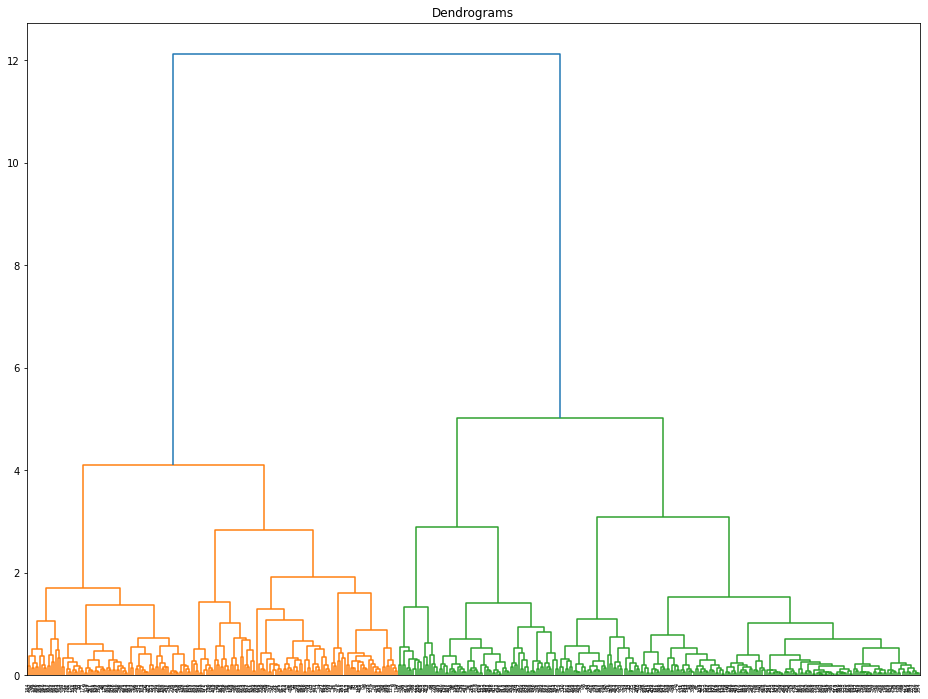

In [14]:
plt.figure(figsize=(8 * 2, 6 * 2))
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.title('Dendrograms')
plt.show()

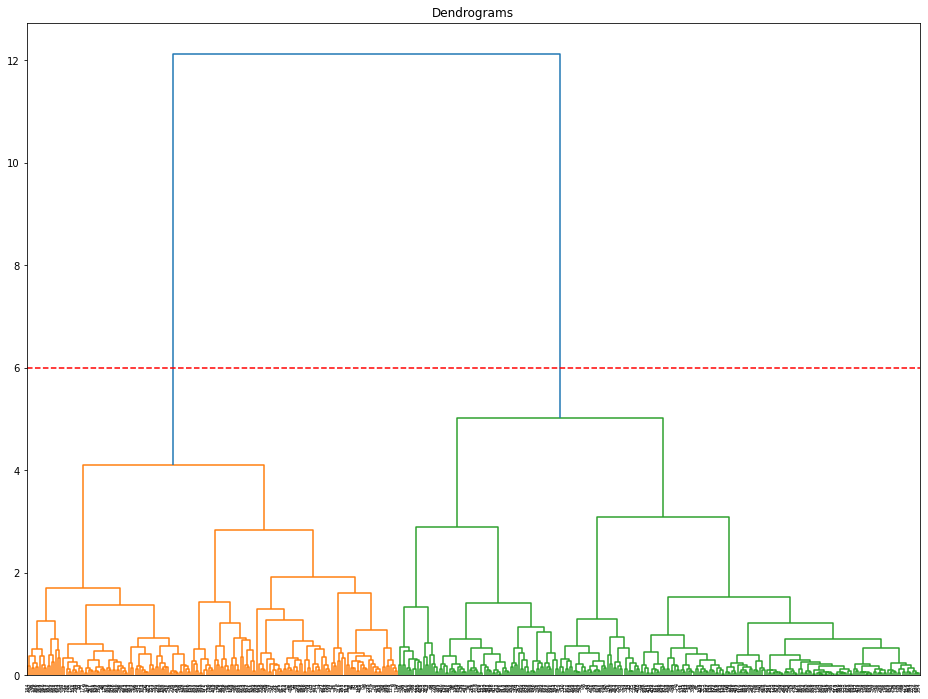

In [15]:
plt.figure(figsize=(8 * 2, 6 * 2))
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')
plt.title('Dendrograms')
plt.show()

## Hierarchical clustering

In [18]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clusters = cluster.fit_predict(df_scaled)

In [22]:
df_cluster = df_scaled.copy()
df_cluster['cluster'] = clusters

In [23]:
df_cluster.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809,1
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286,1
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619,1
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494,0
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294,0


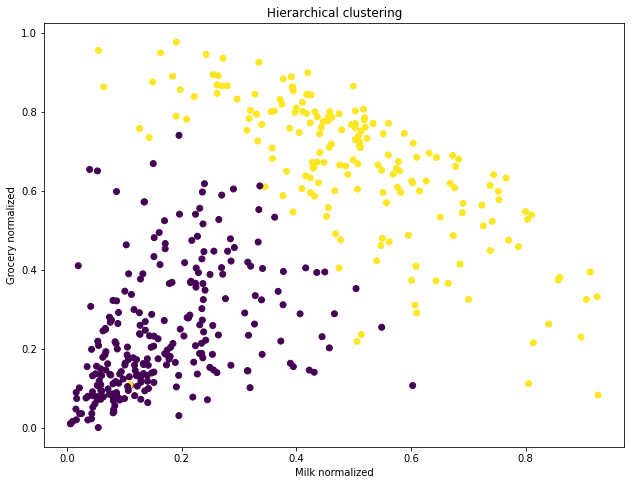

In [25]:
plt.figure(figsize=(8 * 1.3, 6 * 1.3))
plt.scatter(df_cluster['Milk'], df_cluster['Grocery'], c=df_cluster['cluster'])
plt.title('Hierarchical clustering')
plt.xlabel('Milk normalized')
plt.ylabel('Grocery normalized')
plt.show()

## Resource
- [A Beginner’s Guide to Hierarchical Clustering and how to Perform it in Python](https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/)